# House Price Prediction 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
house = pd.read_csv(r"D:\Stuff\IMARTICUS\Python\Python Programming\house_train.csv")

In [3]:
house.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
house.shape

(1460, 81)

In [5]:
pd.set_option("display.max_rows",None)
house.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [6]:
house.isnull().sum() /1460 * 100 

Id                0.000000
MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      17.739726
LotArea           0.000000
Street            0.000000
Alley            93.767123
LotShape          0.000000
LandContour       0.000000
Utilities         0.000000
LotConfig         0.000000
LandSlope         0.000000
Neighborhood      0.000000
Condition1        0.000000
Condition2        0.000000
BldgType          0.000000
HouseStyle        0.000000
OverallQual       0.000000
OverallCond       0.000000
YearBuilt         0.000000
YearRemodAdd      0.000000
RoofStyle         0.000000
RoofMatl          0.000000
Exterior1st       0.000000
Exterior2nd       0.000000
MasVnrType        0.547945
MasVnrArea        0.547945
ExterQual         0.000000
ExterCond         0.000000
Foundation        0.000000
BsmtQual          2.534247
BsmtCond          2.534247
BsmtExposure      2.602740
BsmtFinType1      2.534247
BsmtFinSF1        0.000000
BsmtFinType2      2.602740
BsmtFinSF2        0.000000
B

In [7]:
cols_to_be_dropped = ['Alley', 'PoolQC','Fence',
                      'MiscFeature']

# dropping these columns bcus it's contaning null values more than 75%

In [8]:
house = house.drop(cols_to_be_dropped, axis = 1)

In [9]:
house.shape

(1460, 77)

In [10]:
#house.LotFrontage.value_counts().mean()
#house.MasVnrType.value_counts()
#house.MasVnrArea.value_counts()
#house.BsmtQual.value_counts()
#house.BsmtFinType1.value_counts()
#house.BsmtFinType2.value_counts()
#house.Electrical.value_counts()
#house.FireplaceQu.value_counts()
#house.GarageType.value_counts()
#house.GarageYrBlt.value_counts()
#house.GarageFinish.value_counts()
#house.GarageQual.value_counts()
#house.GarageCond.value_counts()

In [11]:
house.LotFrontage = house.LotFrontage.fillna(house.LotFrontage.mean())
house.MasVnrType = house.MasVnrType.fillna("None")
house.MasVnrArea = house.MasVnrArea.fillna(house.MasVnrArea.mean())
house.BsmtQual = house.BsmtQual.fillna("TA")
house.BsmtCond  = house.BsmtCond.fillna("TA")
house.BsmtExposure = house.BsmtExposure.fillna("No")
house.BsmtFinType1 = house.BsmtFinType1.fillna("Unf")
house.BsmtFinType2 = house.BsmtFinType2 .fillna("Unf")
house.Electrical = house.Electrical.fillna("SBrkr")
house.FireplaceQu = house.FireplaceQu.fillna("Gd")
house.GarageType = house.GarageType.fillna("Attchd")
house.GarageYrBlt = house.GarageYrBlt.fillna(house.GarageYrBlt.median())
house.GarageFinish = house.GarageFinish.fillna("Unf")
house.GarageQual = house.GarageQual.fillna("TA")
house.GarageCond = house.GarageCond.fillna("TA")

In [12]:
house.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual 

In [13]:
# Now data is totally clean has no null values

In [14]:
# checking the outliers of target variable (sales price)
house.SalePrice.skew()

1.8828757597682129

In [15]:
def remove_outliers(df, col, k):
    mean = df[col].mean()
    global df1
    sd = df[col].std()
    final_list = [ x for x in df[col] if (x > mean -k*sd)]
    final_list = [x for x in final_list if (x < mean +k*sd)]
    df1 = df.loc[df[col].isin(final_list)];print(df1.shape);return df1

In [16]:
house = remove_outliers(house,'SalePrice',k =3)

(1438, 77)


(array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]),
 array([-0.5, -0.4, -0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5]),
 <a list of 10 Patch objects>)

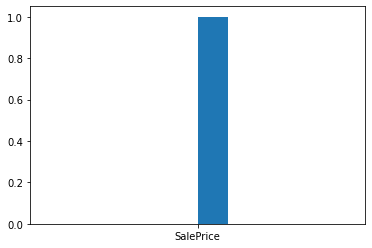

In [17]:
plt.hist("SalePrice")

In [18]:
#Converting all categorical variables to numeric variable

house.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1438 entries, 0 to 1459
Data columns (total 77 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1438 non-null   int64  
 1   MSSubClass     1438 non-null   int64  
 2   MSZoning       1438 non-null   object 
 3   LotFrontage    1438 non-null   float64
 4   LotArea        1438 non-null   int64  
 5   Street         1438 non-null   object 
 6   LotShape       1438 non-null   object 
 7   LandContour    1438 non-null   object 
 8   Utilities      1438 non-null   object 
 9   LotConfig      1438 non-null   object 
 10  LandSlope      1438 non-null   object 
 11  Neighborhood   1438 non-null   object 
 12  Condition1     1438 non-null   object 
 13  Condition2     1438 non-null   object 
 14  BldgType       1438 non-null   object 
 15  HouseStyle     1438 non-null   object 
 16  OverallQual    1438 non-null   int64  
 17  OverallCond    1438 non-null   int64  
 18  YearBuil

In [19]:
house.drop(["Id"], axis = 1 , inplace = True)

In [20]:
house.shape

(1438, 76)

In [21]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [22]:
house[house.select_dtypes(include= 'object').columns]= house[house.select_dtypes(include='object').columns].apply(le.fit_transform)

In [23]:
house.head(10)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,3,65.000000,8450,1,3,3,0,4,0,...,0,0,0,0,0,2,2008,8,4,208500
1,20,3,80.000000,9600,1,3,3,0,2,0,...,0,0,0,0,0,5,2007,8,4,181500
2,60,3,68.000000,11250,1,0,3,0,4,0,...,0,0,0,0,0,9,2008,8,4,223500
3,70,3,60.000000,9550,1,0,3,0,0,0,...,272,0,0,0,0,2,2006,8,0,140000
4,60,3,84.000000,14260,1,0,3,0,2,0,...,0,0,0,0,0,12,2008,8,4,250000
5,50,3,85.000000,14115,1,0,3,0,4,0,...,0,320,0,0,700,10,2009,8,4,143000
6,20,3,75.000000,10084,1,3,3,0,4,0,...,0,0,0,0,0,8,2007,8,4,307000
7,60,3,70.049958,10382,1,0,3,0,0,0,...,228,0,0,0,350,11,2009,8,4,200000
8,50,4,51.000000,6120,1,3,3,0,4,0,...,205,0,0,0,0,4,2008,8,0,129900
9,190,3,50.000000,7420,1,3,3,0,0,0,...,0,0,0,0,0,1,2008,8,4,118000


In [24]:
house_x = house.iloc[:, 1:75]
house_y = house.iloc [:, 75]

In [25]:
house_y.shape

(1438,)

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
house_x_train, house_x_test, house_y_train, house_y_test = train_test_split(house_x, house_y, test_size = .2)

In [28]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression(normalize = True)

In [30]:
reg.fit(house_x, house_y)

LinearRegression(normalize=True)

In [31]:
reg.coef_

array([-2.71602739e+03, -1.18047701e+02,  3.54655186e-01,  3.62003545e+04,
       -7.71422246e+02,  2.26318244e+03, -3.94385133e+04, -4.52793457e+01,
        9.22812660e+03,  3.17478542e+02, -2.51190815e+02, -5.75101780e+03,
       -4.68154916e+03, -1.69248703e+03,  1.13412766e+04,  4.36936326e+03,
        2.38055554e+02,  1.05545290e+02,  1.55500177e+03,  1.84069119e+03,
       -1.09453966e+03,  6.59398688e+02,  1.22711827e+03,  1.88757823e+01,
       -6.97917815e+03,  8.29095984e+02,  1.20252133e+03, -6.80796024e+03,
        1.50698561e+03, -2.44210832e+03, -9.15112259e+02, -1.76822424e+14,
        1.48592803e+03, -1.76822424e+14, -1.76822424e+14,  1.76822424e+14,
       -9.31198594e+02, -7.21927909e+02,  1.90246922e+02, -3.81177316e+02,
        1.19623419e+14,  1.19623419e+14,  1.19623419e+14, -1.19623419e+14,
        9.42160409e+03,  2.95579473e+02,  2.33393567e+03,  3.26414434e+02,
       -7.08514607e+02, -1.09112331e+04, -6.81946864e+03,  2.40646367e+03,
        3.41573409e+03,  

In [32]:
len(reg.coef_)

74

In [33]:
feature_coef = pd.DataFrame({'Feature_Names': house_x.columns, 'Coefs': reg.coef_})
feature_coef

,Feature_Names,Coefs
0,MSZoning,-2.716027e+03
1,LotFrontage,-1.180477e+02
2,LotArea,3.546552e-01
3,Street,3.620035e+04
4,LotShape,-7.714222e+02
5,LandContour,2.263182e+03
6,Utilities,-3.943851e+04
7,LotConfig,-4.527935e+01
8,LandSlope,9.228127e+03
9,Neighborhood,3.174785e+02


In [34]:
feature_coef.sort_values('Coefs', ascending = False)
# Highest  postive values on the top 

,Feature_Names,Coefs
35,TotalBsmtSF,1.768224e+14
40,1stFlrSF,1.196234e+14
41,2ndFlrSF,1.196234e+14
42,LowQualFinSF,1.196234e+14
3,Street,3.620035e+04
14,OverallQual,1.134128e+04
58,GarageCars,1.078148e+04
44,BsmtFullBath,9.421604e+03
8,LandSlope,9.228127e+03
53,Fireplaces,7.031051e+03


In [35]:
Rsquare = reg.score(house_x_train, house_y_train)
Rsquare

0.8531143809444643

In [36]:
N = house_x_train.shape[0]
K =house_x_train.shape[1]

In [37]:
Adj_Rsquare = 1 - (1- Rsquare) * (N-1) / (N-K-1)
Adj_Rsquare

0.8430031848420367

In [39]:
pred_train = reg.predict(house_x_train)
pred_test = reg.predict(house_x_test)



error_train = house_y_train - pred_train
error_test = house_y_test - pred_test

In [40]:
np.mean(error_train) # your mean is close to zero bcus you cannot
#see in isolation if you comapre to the skell of target variable it seems 
#to be close to zero

-32.62223300230922

In [41]:
MAPE = np.mean(np.abs(error_test /house_y_test) * 100)
MAPE

10.394568123863476

In [42]:
Accuracy = np.round (100-MAPE)
Accuracy

90.0

In [43]:
np.mean(house_y_train) 
# your mean of y cannot be negative.

176114.6243478261

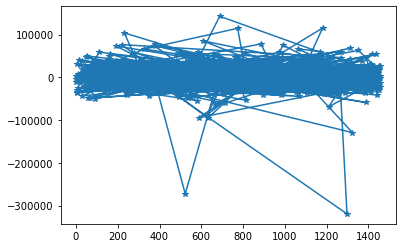

In [44]:
plt.plot(error_train, marker = "*")

In [45]:
df = pd.DataFrame({'pred':pred_train, 'actual':house_y_train}) 

In [46]:
import seaborn as sns

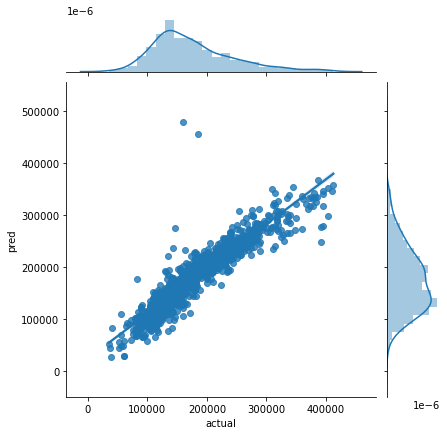

In [47]:
sns.jointplot(x='actual', y = 'pred', kind = 'reg', data=df)

In [48]:
from sklearn.metrics import mean_absolute_error, mean_squared_error 
# to find mse and mae using sklearn 

In [49]:
# let's find MSE, RMSE and MAE on the test data
#MSE --> error , square of error , mean

error_test = house_y_test - pred_test
MSE = np.mean(np.square(error_test))
MSE

553959530.5710264

In [50]:
#Finding RMSE
RMSE = np.square(MSE)
RMSE
#

3.06871161510472e+17

In [51]:
MAE = np.mean(np.abs(error_test))
MAE

17341.48493177031

In [ ]:
# Let's check our Linear Regression assumption 
# you check your assumption train data bcus your model is build on test data.

(array([  1.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   1.,   0.,   2.,   1.,   4.,  13.,  73., 217., 396., 264.,
        105.,  39.,  19.,   9.,   1.,   1.,   2.,   1.]),
 array([-319461.01963166, -304047.93628538, -288634.8529391 ,
        -273221.76959282, -257808.68624654, -242395.60290027,
        -226982.51955399, -211569.43620771, -196156.35286143,
        -180743.26951515, -165330.18616887, -149917.10282259,
        -134504.01947631, -119090.93613003, -103677.85278376,
         -88264.76943748,  -72851.6860912 ,  -57438.60274492,
         -42025.51939864,  -26612.43605236,  -11199.35270608,
           4213.7306402 ,   19626.81398648,   35039.89733275,
          50452.98067903,   65866.06402531,   81279.14737159,
          96692.23071787,  112105.31406415,  127518.39741043,
         142931.48075671]),
 <a list of 30 Patch objects>)

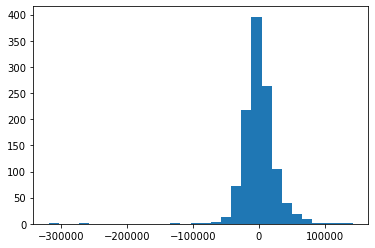

In [52]:
plt.hist(error_train, bins = 30)

# LASSO REGRESSION

In [53]:
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(house_x, house_y)

Lasso()

In [54]:
lasso.coef_

array([-2.74710324e+03, -1.18255335e+02,  3.57393973e-01,  3.54572382e+04,
       -8.21238545e+02,  2.28735461e+03, -3.73541669e+04, -2.30565240e+01,
        9.06252154e+03,  3.17587962e+02, -2.82144954e+02, -5.63812616e+03,
       -4.66950391e+03, -1.71415486e+03,  1.13264629e+04,  4.35632573e+03,
        2.37598047e+02,  1.05834529e+02,  1.51767056e+03,  1.84956895e+03,
       -1.09006726e+03,  6.53695737e+02,  1.20359501e+03,  1.89424541e+01,
       -6.95955638e+03,  8.32001657e+02,  1.19340923e+03, -6.79033222e+03,
        1.45710253e+03, -2.43722893e+03, -8.96129021e+02,  2.31170915e+00,
        1.45965067e+03,  1.09094916e+01,  2.66195195e-01,  3.36007087e-01,
       -9.54454742e+02, -7.38060476e+02,  3.31955311e+02, -3.94559299e+02,
        3.48244184e+01,  2.92916937e+01,  8.50589410e+00,  4.62136948e+00,
        9.40798674e+03,  3.14671599e+02,  2.31497912e+03,  2.59642827e+02,
       -7.03632115e+02, -1.06249852e+04, -6.82131263e+03,  2.38285307e+03,
        3.45003163e+03,  

# Ridge Regression 

In [55]:
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(house_x,house_y)

Ridge()

In [56]:
ridge.coef_

array([-2.72243146e+03, -1.18222997e+02,  3.51145255e-01,  2.98656696e+04,
       -8.24187892e+02,  2.30867811e+03, -1.85421835e+04, -1.02671522e+01,
        8.85071989e+03,  3.12047857e+02, -3.17474504e+02, -5.60823663e+03,
       -4.69632809e+03, -1.74383895e+03,  1.13429415e+04,  4.35860683e+03,
        2.37879595e+02,  1.07420193e+02,  1.54013074e+03,  1.90848251e+03,
       -1.08837897e+03,  6.52699681e+02,  1.22658917e+03,  1.87674211e+01,
       -6.86318104e+03,  8.23797861e+02,  1.21338929e+03, -6.83541831e+03,
        1.42906323e+03, -2.44435783e+03, -9.09247434e+02, -8.71722113e-01,
        1.46484699e+03,  7.59039189e+00, -2.98660533e+00,  3.73206523e+00,
       -8.77132141e+02, -7.39238707e+02,  4.36489544e+02, -3.35539294e+02,
        1.77679863e+01,  1.23887865e+01, -8.42866968e+00,  2.17280882e+01,
        9.31826052e+03,  1.21198118e+02,  2.33289100e+03,  3.23913828e+02,
       -7.18711429e+02, -1.03124968e+04, -6.81864486e+03,  2.34850685e+03,
        3.42683955e+03,  

# Random Forest Regressor 

In [57]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=200, max_depth = 6)

In [58]:
rf.fit(house_x_train, house_y_train)

RandomForestRegressor(max_depth=6, n_estimators=200)

In [59]:
Rsquare = rf.score(house_x_train, house_y_train)
Rsquare

0.9336062020529637

In [60]:
N = house_x_train.shape[0]
K =house_x_train.shape[1]

Adj_Rsquare = 1 - (1- Rsquare) * (N-1) / (N-K-1)
Adj_Rsquare

0.9290358382873073

In [61]:
pred_ran = rf.predict(house_x_test)

In [62]:
error_rf = house_y_test - pred_ran

In [63]:
from sklearn.model_selection import cross_val_score

In [64]:
# cross validation square

cvs = cross_val_score(rf, house_x_train, house_y_train, cv=5, scoring="r2")
cvs.mean()  #max, #min

0.8427743759761013

In [65]:
#Rmse
rmse = np.sqrt(mean_squared_error(house_y_test,pred_ran))
rmse

24152.27762834917

In [66]:
#Mape
mape = np.mean(np.abs(error_rf/house_y_test)*100)
mape

11.533787277549104

In [67]:
Accuracy = 100-mape
print("Accuracy of the model is", np.round(Accuracy),"%")

Accuracy of the model is 88.0 %


# Xgboost

In [68]:
from  xgboost import XGBRegressor 
xg= XGBRegressor(n_estimators=130, max_depth=3, learning_rate=0.15,subsample = 0.7)

In [70]:
xg.fit(house_x_train,house_y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.15, max_delta_step=0, max_depth=3,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=130, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.7,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [73]:
pred_xg = xg.predict(house_x_test)
error_xg = house_y_test-pred_xg
Rsquare = xg.score(house_x_train, house_y_train)
print("Rsquare:", Rsquare)
N=house_x_train.shape[0]
K=house_x_train.shape[1]


Adjusted_Rsquare = 1-(1-Rsquare)*(N-1)/(N-K-1)
print("value of Adjusted_Rsquare is", Adjusted_Rsquare)

Rsquare: 0.975115979961183
value of Adjusted_Rsquare is 0.9734030334654877


In [75]:
#MAPE 
MAPE = np.mean(np.abs(error_xg/house_y_test)*100)
print("MAPE value is :", MAPE)

MAPE value is : 9.159006983323202


In [76]:
RMSE = np.sqrt(mean_squared_error(house_y_test, pred_xg))
print("RMSE value is :", RMSE)

RMSE value is : 20513.109534171825


In [77]:
ACCURACY = 100 -MAPE
print("ACCURACY of the model is", np.round(ACCURACY), "%")

ACCURACY of the model is 91.0 %
